In [1]:
#1. Загрузка данных

In [ ]:
import os
import pandas as pd

# Определяем базовую директорию на основе местоположения текущего файла
base_dir = os.getcwd()

# Импортируем модуль для загрузки данных и выполнения EDA
from Modules.data_loader import load_har_dataset

# Загрузка и распаковка данных
load_har_dataset(base_dir)

In [3]:
#2. EDA-анализ

In [4]:
# Импортируем модуль для EDA
from Modules.eda import EDA

# Инициализация EDA
eda = EDA(base_dir)

#2.1: Изучение структуры данных
eda.display_basic_info()
print("""
Датасет содержит 563 признака: 561 - показатели измерений (float64),
subject - идентификатор участника (целочисленный от 1 до 30),
Activity - категориальный признак, тип активности (целевая переменная) с вариантами значений:
STANDING, SITTING, LAYING, WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS.
Осноной набор содержит 7352 значения, тренировочный - 2947 строк
""")

Train data shape: (7352, 563)
Test data shape: (2947, 563)

Columns and their data types:
 tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object

First few rows of train data:
    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()

In [5]:
#2.2: Проверка пропущенных значений
eda.check_missing_values()
print("В данных отсутствуют пропущенные значения.")

Missing values in train data:
0
Missing values in test data:
0
В данных отсутствуют пропущенные значения.


Activity counts:
 Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


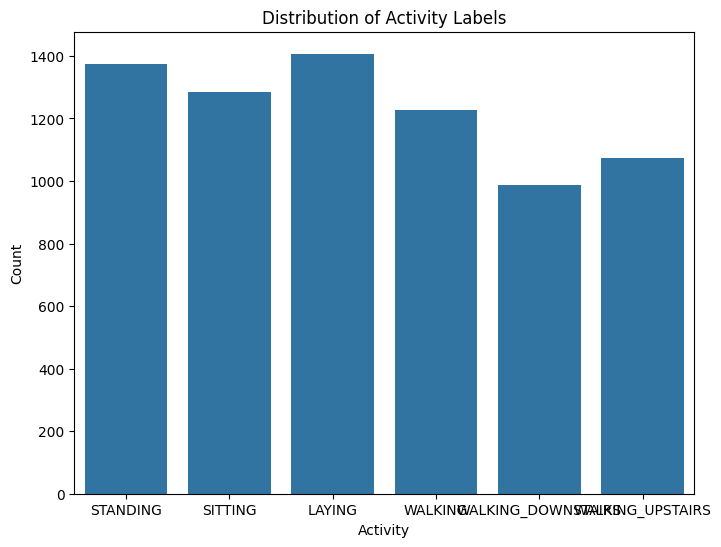

Целевая переменная 'Activity' имеет равномерное распределение значений, что свидетельствует о стратифицированной выборке.


In [6]:
#2.3: Анализ целевой переменной
eda.analyze_target_variable()
print("Целевая переменная 'Activity' имеет равномерное распределение значений, что свидетельствует о стратифицированной выборке.")

Statistical summary of numerical features:
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999

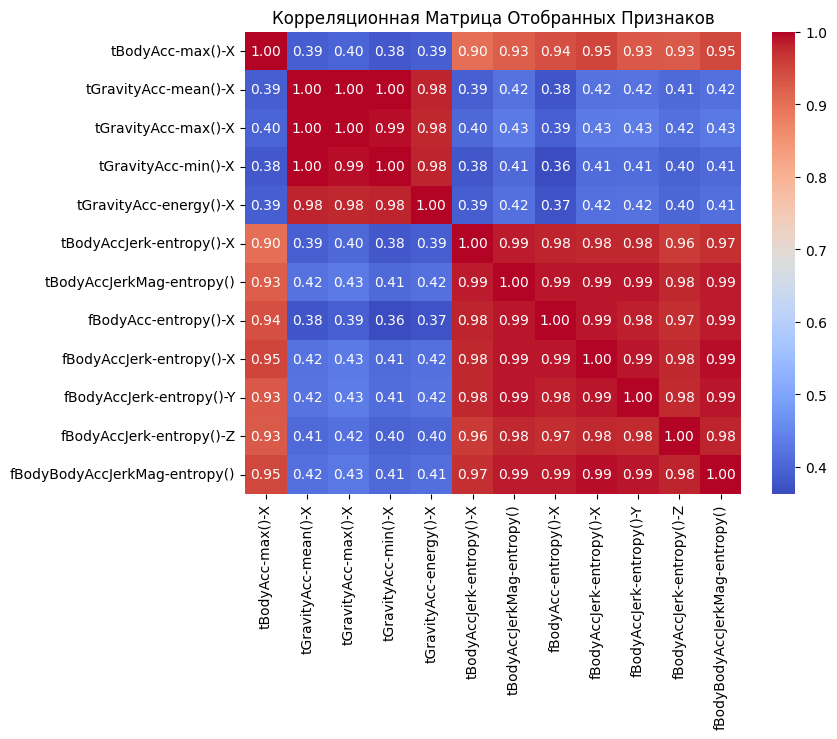


Все числовые признаки варьируются в диапазоне от -1 до 1.
Средние значения признаков близки к нулю, что может указывать на предварительную нормализацию данных.
Мы используем метод SelectKBest с ANOVA F-тестом для выбора топ-12 наиболее значимых признаков.
Корреляционная матрица построена для 12 наиболее значимых признаков.



In [7]:
#2.4: Анализ признаков
eda.analyze_features()
print("""
Все числовые признаки варьируются в диапазоне от -1 до 1.
Средние значения признаков близки к нулю, что может указывать на предварительную нормализацию данных.
Мы используем метод SelectKBest с ANOVA F-тестом для выбора топ-12 наиболее значимых признаков.
Корреляционная матрица построена для 12 наиболее значимых признаков.
""")

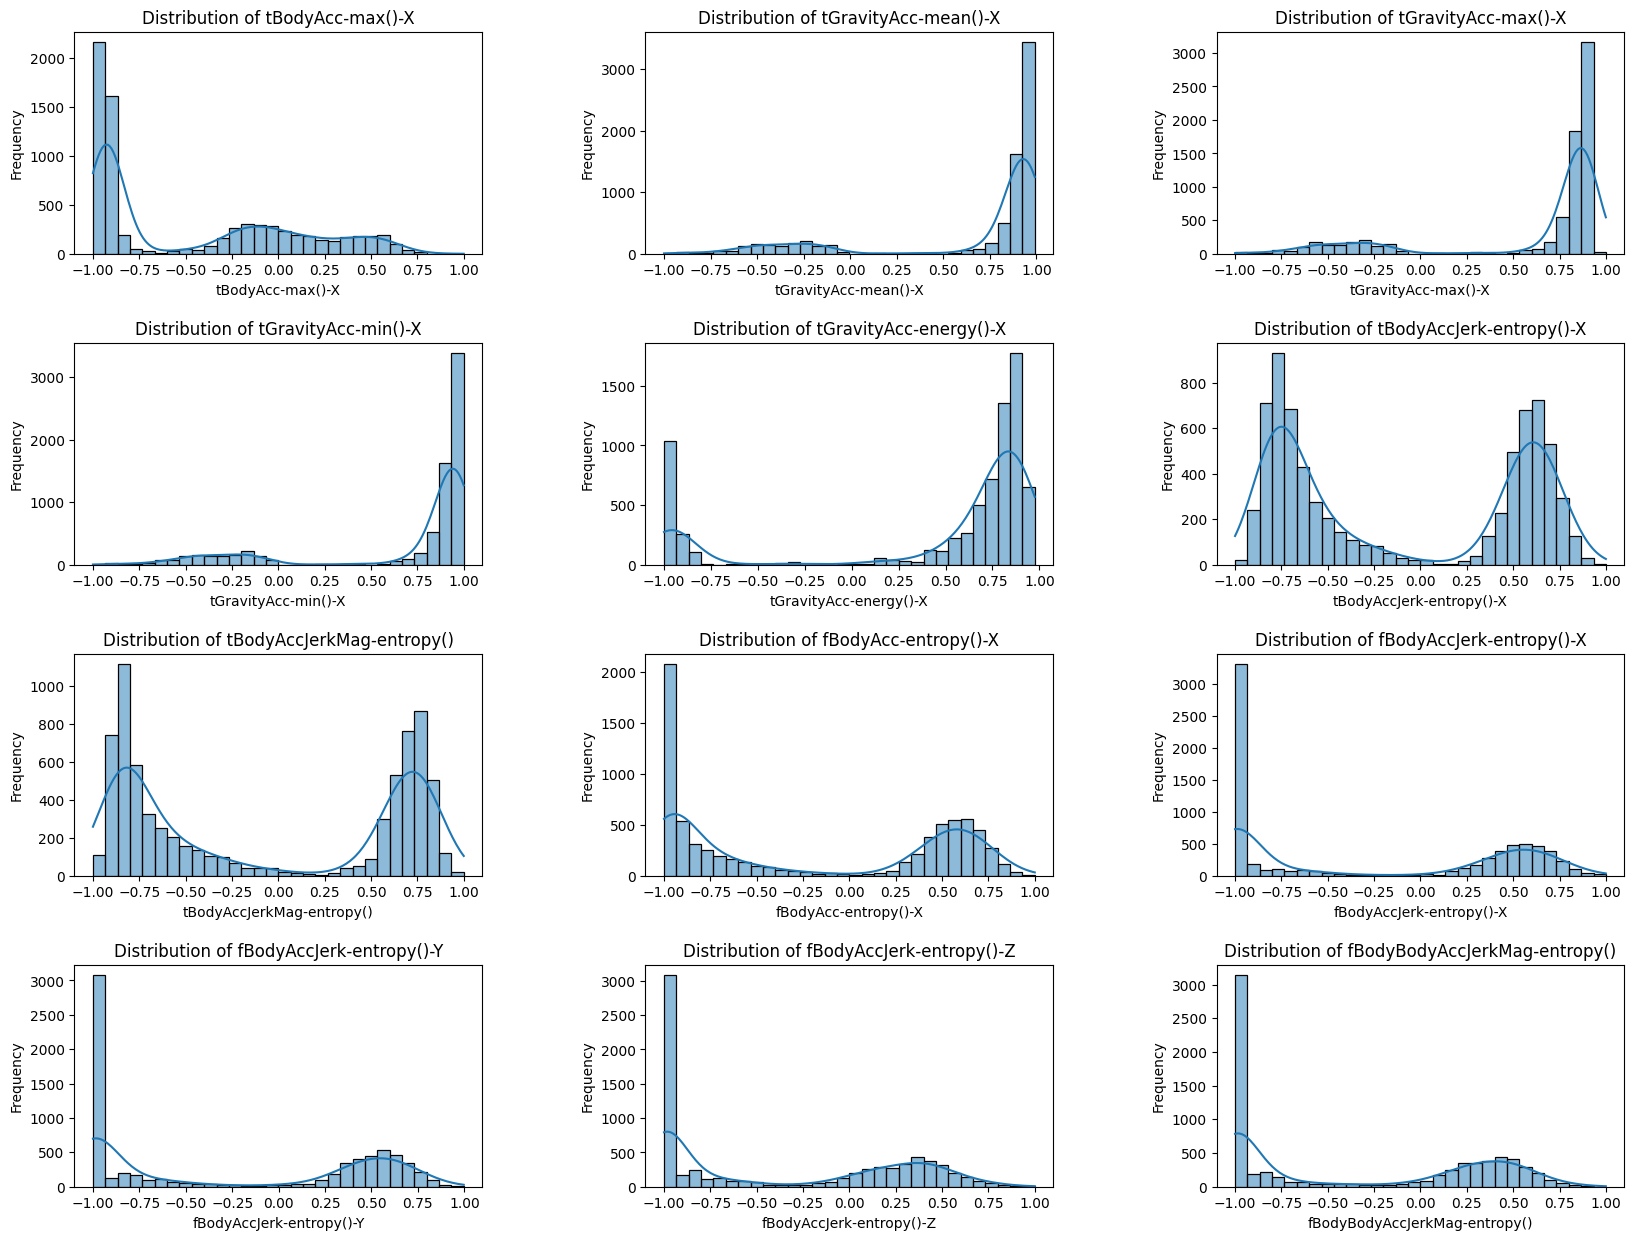


Визуальный анализ топ-12 признаков опровергает гипотезу о нормальном распределении признаков



In [8]:
#2.5: Визуализация признаков
eda.visualize_features()
print("""
Визуальный анализ топ-12 признаков опровергает гипотезу о нормальном распределении признаков
""")

Выбросы по топ-12 признакам:
tBodyAcc-max()-X - Доверительный интервал: [-2.10, 1.16] - Выходят ниже: 0, Выходят выше: 0
tGravityAcc-mean()-X - Доверительный интервал: [-0.89, 2.21] - Выходят ниже: 27, Выходят выше: 0
tGravityAcc-max()-X - Доверительный интервал: [-0.93, 2.13] - Выходят ниже: 25, Выходят выше: 0
tGravityAcc-min()-X - Доверительный интервал: [-0.85, 2.20] - Выходят ниже: 31, Выходят выше: 0
tGravityAcc-energy()-X - Доверительный интервал: [-1.66, 2.53] - Выходят ниже: 0, Выходят выше: 0
tBodyAccJerk-entropy()-X - Доверительный интервал: [-2.06, 1.86] - Выходят ниже: 0, Выходят выше: 0
tBodyAccJerkMag-entropy() - Доверительный интервал: [-2.26, 2.11] - Выходят ниже: 0, Выходят выше: 0
fBodyAcc-entropy()-X - Доверительный интервал: [-2.39, 1.96] - Выходят ниже: 0, Выходят выше: 0
fBodyAccJerk-entropy()-X - Доверительный интервал: [-2.53, 1.98] - Выходят ниже: 0, Выходят выше: 0
fBodyAccJerk-entropy()-Y - Доверительный интервал: [-2.48, 1.94] - Выходят ниже: 0, Выходят выш

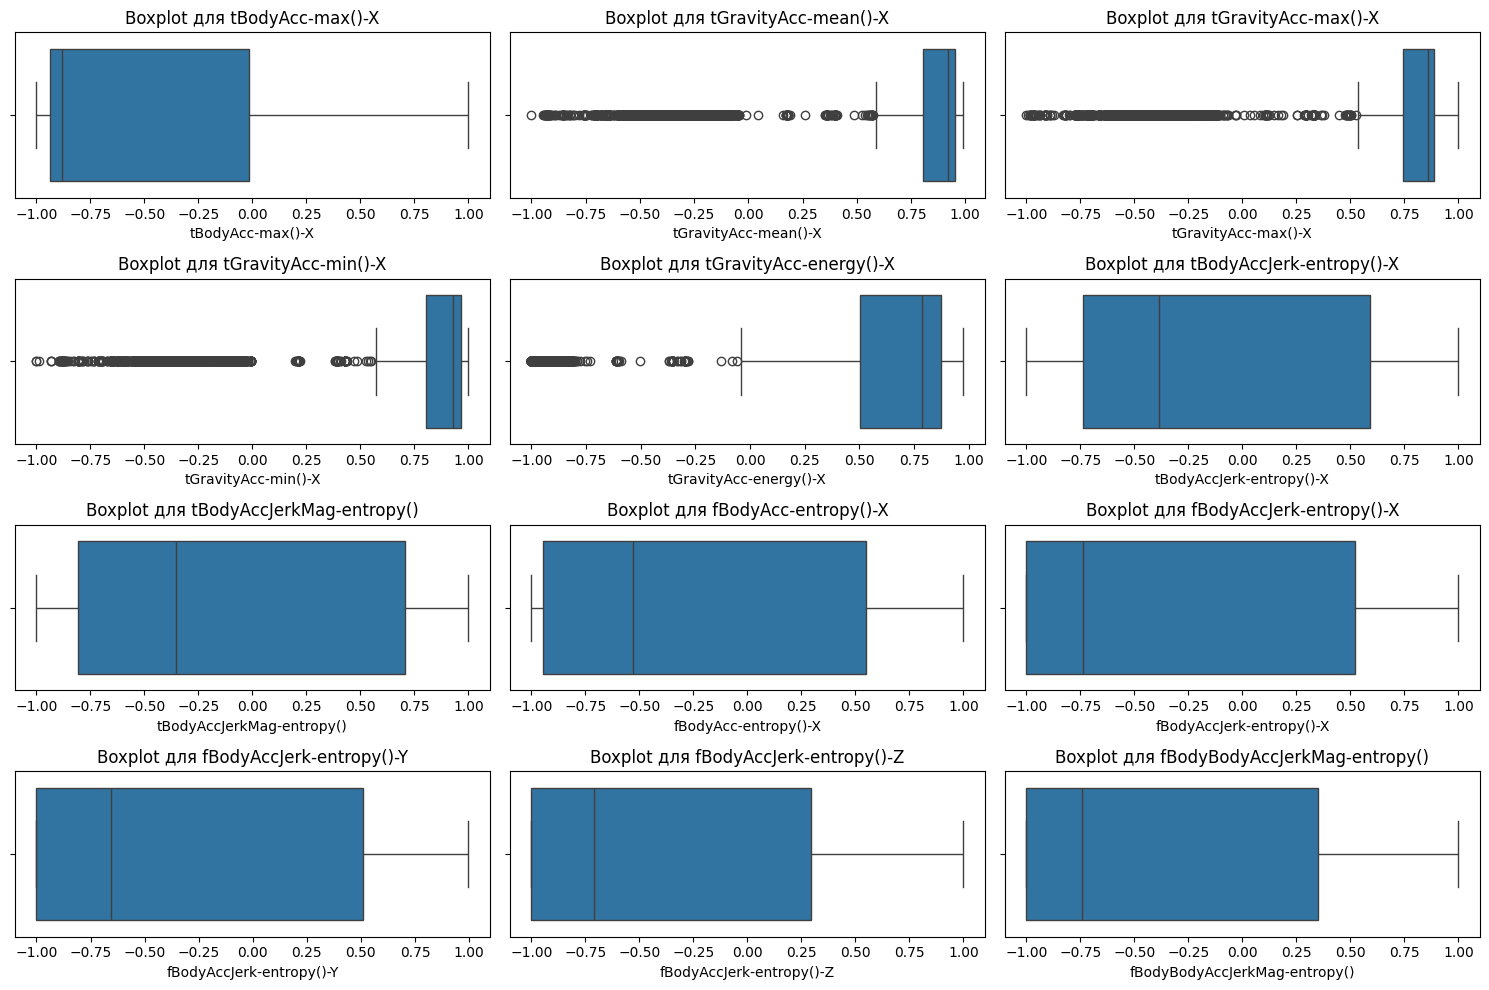

In [9]:
#2.6: Обнаружение выбросов
eda.detect_outliers()

In [10]:
#3. Предобработка данных

In [11]:
# Импорт модуля предобработки
from Modules.preprocessing import DataPreprocessor

# Создаем экземпляр DataPreprocessor
preprocessor = DataPreprocessor()

#3.1 Обработка пропущенных значений
print("В датасете отсутствуют пропуски, поэтому не требуется их предварительное заполнение\n")

#3.2 Кодирование категориальных признаков
"""XGBoost ожидает, что целевая переменная будет закодирована в числовом формате.
Используем LabelEncoder для преобразования целевой переменной в числовые значения.
"""

columns_to_encode = ['Activity']
train_data_encoded, test_data_encoded = preprocessor.encode_categorical(eda.train_data.copy(), eda.test_data.copy(), columns_to_encode)

В датасете отсутствуют пропуски, поэтому не требуется их предварительное заполнение

Категориальные признаки закодированы с помощью LabelEncoder.
Новая кодировка для 'Activity':
LAYING = 0
SITTING = 1
STANDING = 2
WALKING = 3
WALKING_DOWNSTAIRS = 4
WALKING_UPSTAIRS = 5


In [12]:
#3.3 Масштабирование числовых признаков

# Импорт модуля разных алгоритмов масштабирования
from Modules.scaling import DataScaler
scaler = DataScaler()

# Стандартизация
standard_scaled_train_data = scaler.standard_scale(eda.train_data.copy())
standard_scaled_test_data = scaler.standard_scale(eda.test_data.copy())
print("Числовые признаки масштабированы с использованием StandardScaler.")

# Масштабирование Min-Max
minmax_scaled_train_data = scaler.minmax_scale(eda.train_data.copy())
minmax_scaled_test_data = scaler.minmax_scale(eda.test_data.copy())
print("Числовые признаки масштабированы с использованием MinMaxScaler.")

# Масштабирование MaxAbs
maxabs_scaled_train_data = scaler.maxabs_scale(eda.train_data.copy())
maxabs_scaled_test_data = scaler.maxabs_scale(eda.test_data.copy())
print("Числовые признаки масштабированы с использованием MaxAbsScaler.")

# Нормализация к единичной длине
normalized_train_data = scaler.normalize(eda.train_data.copy())
normalized_test_data = scaler.normalize(eda.test_data.copy())
print("Числовые признаки нормализованы к единичной длине.")

Числовые признаки масштабированы с использованием StandardScaler.
Числовые признаки масштабированы с использованием MinMaxScaler.
Числовые признаки масштабированы с использованием MaxAbsScaler.
Числовые признаки нормализованы к единичной длине.


In [38]:
#4. Обучение моделей

In [39]:
# Импортируем необходимые библиотеки для оценки моделей
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Импортируем модуль для обучения моделей
from Modules.model_training import ModelTraining

# Инициализация ModelTraining
model_trainer = ModelTraining()

import time
import psutil

# Инициализация процесса
process = psutil.Process()


In [14]:
#4.1 Логистическая регрессия

Обучение модели на исходных данных (без масштабирования):


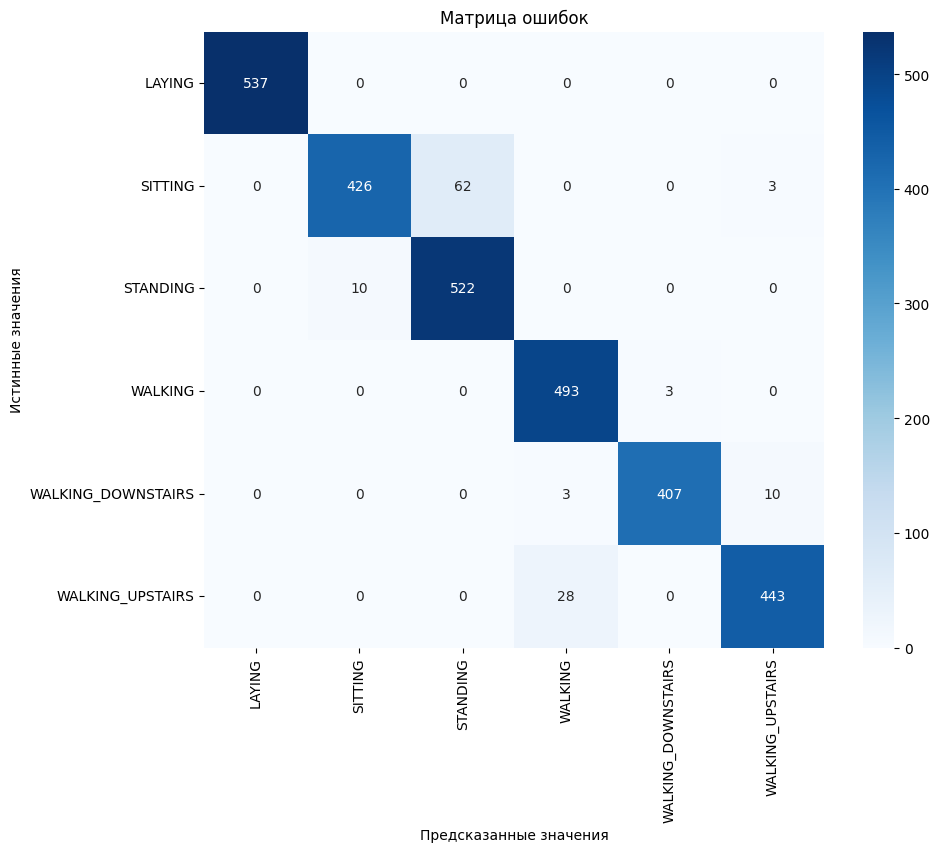

Точность (Логистическая регрессия, исходные данные): 0.9596
Отчет классификации (исходные данные):
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.89      0.98      0.94       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.94      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947


Модель логистической регрессии показывает отличные результаты метрик на тестовых данных,
однако есть признаки переобучения на классе "Лежание".
Чаще всего модель путает "Сидение" и "Стояние".



In [15]:
#4.1.1 Логистическая регрессия без масштабирования
print("Обучение модели на исходных данных (без масштабирования):")
X_train_raw = eda.train_data.drop(columns=['Activity'])
y_train_raw = eda.train_data['Activity']
X_test_raw = eda.test_data.drop(columns=['Activity'])
y_test_raw = eda.test_data['Activity']

model_raw, accuracy_raw, report_raw, conf_matrix_raw = model_trainer.train_logistic_regression(X_train_raw, y_train_raw, X_test_raw, y_test_raw)

print(f'Точность (Логистическая регрессия, исходные данные): {accuracy_raw:.4f}')
print('Отчет классификации (исходные данные):')
print(report_raw)
print("""
Модель логистической регрессии показывает отличные результаты метрик на тестовых данных,
однако есть признаки переобучения на классе "Лежание".
Чаще всего модель путает "Сидение" и "Стояние".
""")


Поскольку логистическая регрессия чувствительна к масштабированию признаков,
построим модель еще раз на стандартизированных данных,
для оценки влияния предварительной обработки на метрику качества.



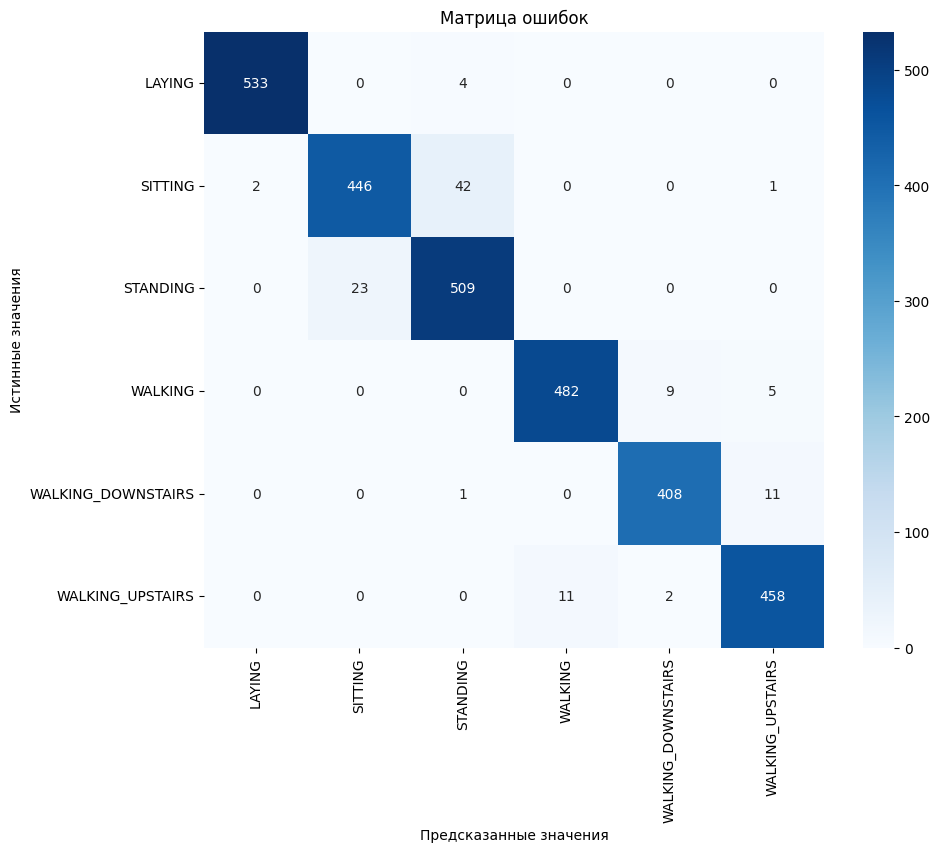

Точность (Логистическая регрессия, стандартизованные данные): 0.9623
Отчет классификации (стандартизованные данные):
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       537
           SITTING       0.95      0.91      0.93       491
          STANDING       0.92      0.96      0.94       532
           WALKING       0.98      0.97      0.97       496
WALKING_DOWNSTAIRS       0.97      0.97      0.97       420
  WALKING_UPSTAIRS       0.96      0.97      0.97       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947


Стандартизация данных позволила избежать переобучения и подняла метрику точности с 0.9596 до 0.9623.



In [16]:
#4.1.2 Логистическая регрессия со стандартизацией
print("""
Поскольку логистическая регрессия чувствительна к масштабированию признаков,
построим модель еще раз на стандартизированных данных,
для оценки влияния предварительной обработки на метрику качества.
""")

X_train_std = standard_scaled_train_data.drop(columns=['Activity'])
y_train_std = standard_scaled_train_data['Activity']
X_test_std = standard_scaled_test_data.drop(columns=['Activity'])
y_test_std = standard_scaled_test_data['Activity']

# Измерение времени выполнения логистической регрессии со стандартизацией (для сравнения трудозатратности с Градиентным бустингом
start_time = time.time()

model_std, accuracy_std, report_std, conf_matrix_std = model_trainer.train_logistic_regression(X_train_std, y_train_std, X_test_std, y_test_std)

end_time = time.time()
execution_time_lr_std = end_time - start_time
memory_info_lr_std = process.memory_info()
cpu_percent_lr_std = process.cpu_percent(interval=None)

print(f'Точность (Логистическая регрессия, стандартизованные данные): {accuracy_std:.4f}')
print('Отчет классификации (стандартизованные данные):')
print(report_std)
print(f"""
Стандартизация данных позволила избежать переобучения и подняла метрику точности с {accuracy_raw:.4f} до {accuracy_std:.4f}.
""")


In [17]:
#4.2 K-ближайших соседей (KNN)

Обучение модели K-ближайших соседей (KNN) на исходных данных (без масштабирования):


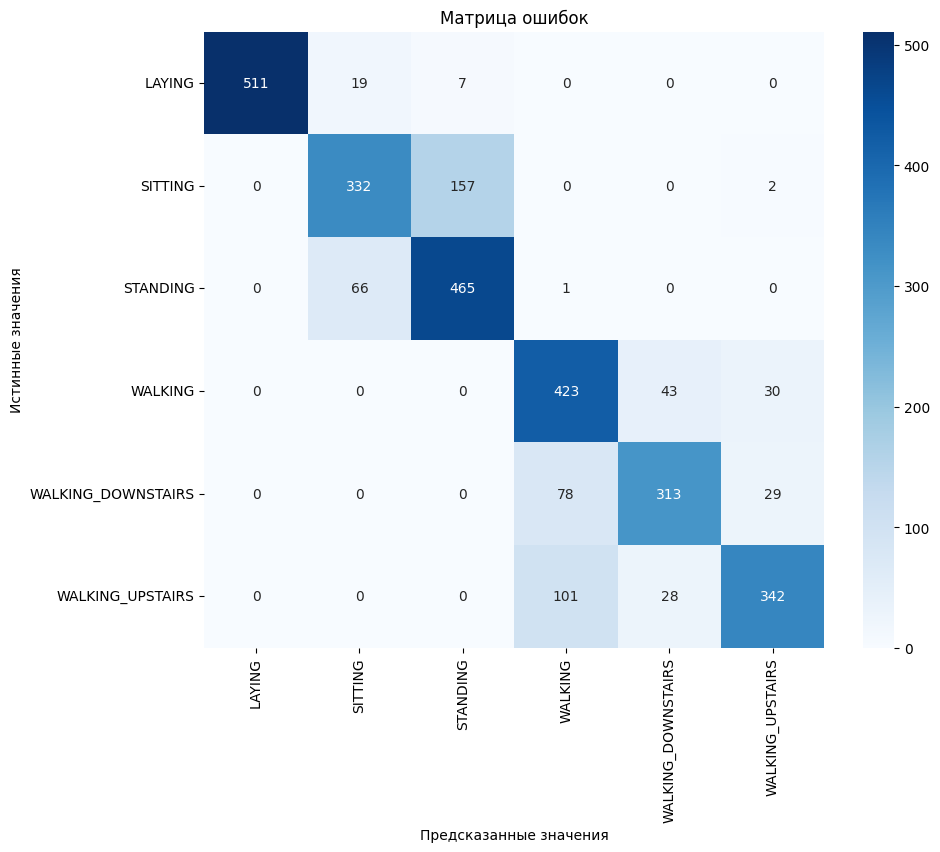

Точность (KNN, исходные данные): 0.8096
Отчет классификации (KNN, исходные данные):
                    precision    recall  f1-score   support

            LAYING       1.00      0.95      0.98       537
           SITTING       0.80      0.68      0.73       491
          STANDING       0.74      0.87      0.80       532
           WALKING       0.70      0.85      0.77       496
WALKING_DOWNSTAIRS       0.82      0.75      0.78       420
  WALKING_UPSTAIRS       0.85      0.73      0.78       471

          accuracy                           0.81      2947
         macro avg       0.82      0.80      0.81      2947
      weighted avg       0.82      0.81      0.81      2947


Метрика качества у К-опорных векторов 0.8096 хуже, чем у логистической регрессии 0.9596,
но нет переобучения даже на данных без стандартизации.



In [18]:
#4.2.1 K-ближайших соседей (KNN) на исходных данных (без масштабирования)
print("Обучение модели K-ближайших соседей (KNN) на исходных данных (без масштабирования):")
X_train_raw = eda.train_data.drop(columns=['Activity'])
y_train_raw = eda.train_data['Activity']
X_test_raw = eda.test_data.drop(columns=['Activity'])
y_test_raw = eda.test_data['Activity']

model_knn_raw, accuracy_knn_raw, report_knn_raw, conf_matrix_knn_raw = model_trainer.train_knn(X_train_raw, y_train_raw, X_test_raw, y_test_raw)

print(f'Точность (KNN, исходные данные): {accuracy_knn_raw:.4f}')
print('Отчет классификации (KNN, исходные данные):')
print(report_knn_raw)
print(f"""
Метрика качества у К-опорных векторов {accuracy_knn_raw:.4f} хуже, чем у логистической регрессии {accuracy_raw:.4f},
но нет переобучения даже на данных без стандартизации.
""")

Поскольку KNN чувствителен к масштабированию признаков, проверим модель на данных, обработанных с помощью MinMaxScaler:


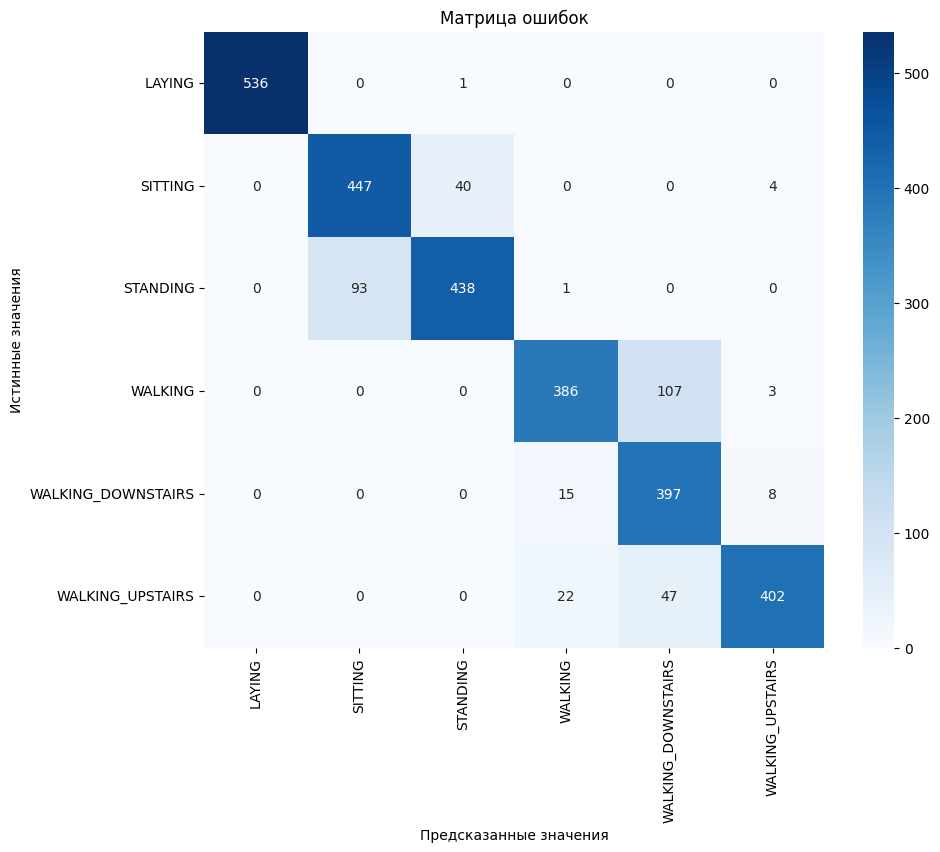

Точность (KNN, Min-Max масштабирование): 0.8843
Отчет классификации (KNN, Min-Max масштабирование):
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.83      0.91      0.87       491
          STANDING       0.91      0.82      0.87       532
           WALKING       0.91      0.78      0.84       496
WALKING_DOWNSTAIRS       0.72      0.95      0.82       420
  WALKING_UPSTAIRS       0.96      0.85      0.91       471

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.90      0.88      0.89      2947


Min-Max масштабирование вызвало переобучение по классу "Лежание".



In [19]:
#4.2.2 K-ближайших соседей (KNN) на данных с масштабированием Min-Max
print("Поскольку KNN чувствителен к масштабированию признаков, проверим модель на данных, обработанных с помощью MinMaxScaler:")
X_train_minmax = minmax_scaled_train_data.drop(columns=['Activity'])
y_train_minmax = minmax_scaled_train_data['Activity']
X_test_minmax = minmax_scaled_test_data.drop(columns=['Activity'])
y_test_minmax = minmax_scaled_test_data['Activity']

model_knn_minmax, accuracy_knn_minmax, report_knn_minmax, conf_matrix_knn_minmax = model_trainer.train_knn(X_train_minmax, y_train_minmax, X_test_minmax, y_test_minmax)

print(f'Точность (KNN, Min-Max масштабирование): {accuracy_knn_minmax:.4f}')
print('Отчет классификации (KNN, Min-Max масштабирование):')
print(report_knn_minmax)
print("""
Min-Max масштабирование вызвало переобучение по классу "Лежание".
""")

Проверим другой метод масштабирования исходных данных для KNN - нормализация:


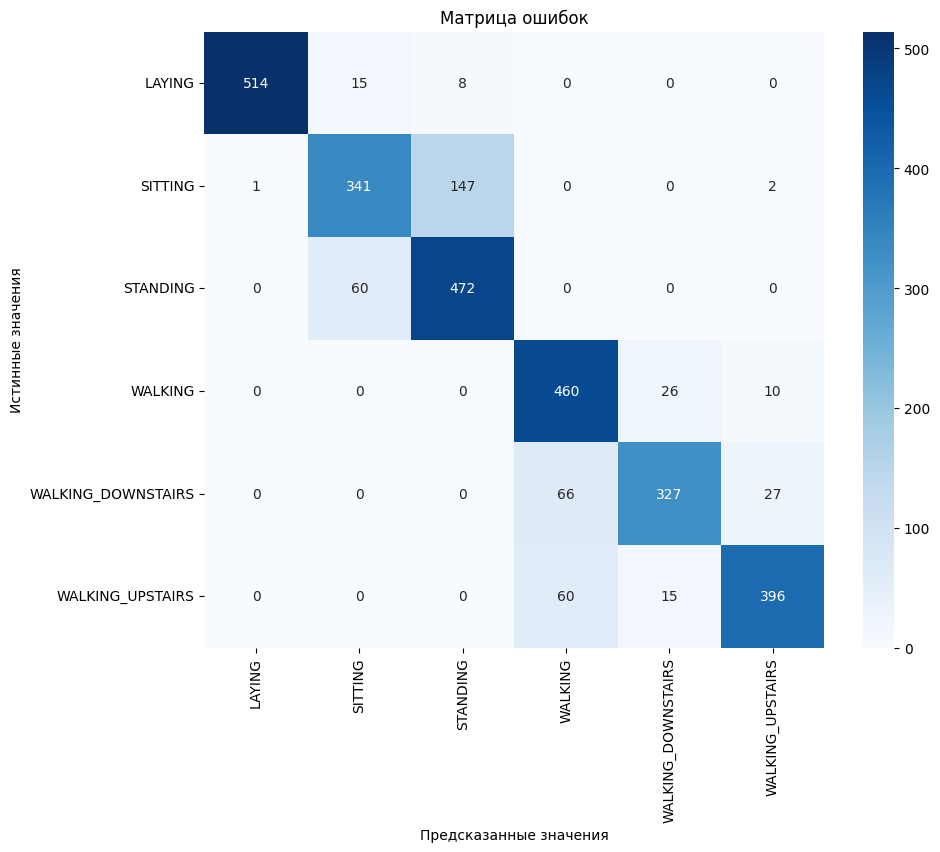

Точность (KNN, нормализованные данные): 0.8517
Отчет классификации (KNN, нормализованные данные):
                    precision    recall  f1-score   support

            LAYING       1.00      0.96      0.98       537
           SITTING       0.82      0.69      0.75       491
          STANDING       0.75      0.89      0.81       532
           WALKING       0.78      0.93      0.85       496
WALKING_DOWNSTAIRS       0.89      0.78      0.83       420
  WALKING_UPSTAIRS       0.91      0.84      0.87       471

          accuracy                           0.85      2947
         macro avg       0.86      0.85      0.85      2947
      weighted avg       0.86      0.85      0.85      2947


Нормализация данных подняла метрику KNN c 0.8096 до 0.8517 без вызова переобучения,
но всё равно точность KNN даже с предварительной обработкой остается ниже,
чем у логистической регрессии со стандартизацией 0.9623.



In [20]:
#4.2.3 K-ближайших соседей (KNN) на нормализованных данных
print("Проверим другой метод масштабирования исходных данных для KNN - нормализация:")
X_train_norm = normalized_train_data.drop(columns=['Activity'])
y_train_norm = normalized_train_data['Activity']
X_test_norm = normalized_test_data.drop(columns=['Activity'])
y_test_norm = normalized_test_data['Activity']

model_knn_norm, accuracy_knn_norm, report_knn_norm, conf_matrix_knn_norm = model_trainer.train_knn(X_train_norm, y_train_norm, X_test_norm, y_test_norm)

print(f'Точность (KNN, нормализованные данные): {accuracy_knn_norm:.4f}')
print('Отчет классификации (KNN, нормализованные данные):')
print(report_knn_norm)
print(f"""
Нормализация данных подняла метрику KNN c {accuracy_knn_raw:.4f} до {accuracy_knn_norm:.4f} без вызова переобучения,
но всё равно точность KNN даже с предварительной обработкой остается ниже,
чем у логистической регрессии со стандартизацией {accuracy_std:.4f}.
""")

In [21]:
#4.3 Метод опорных векторов (SVM)

Обучение модели SVM на исходных данных (без масштабирования):


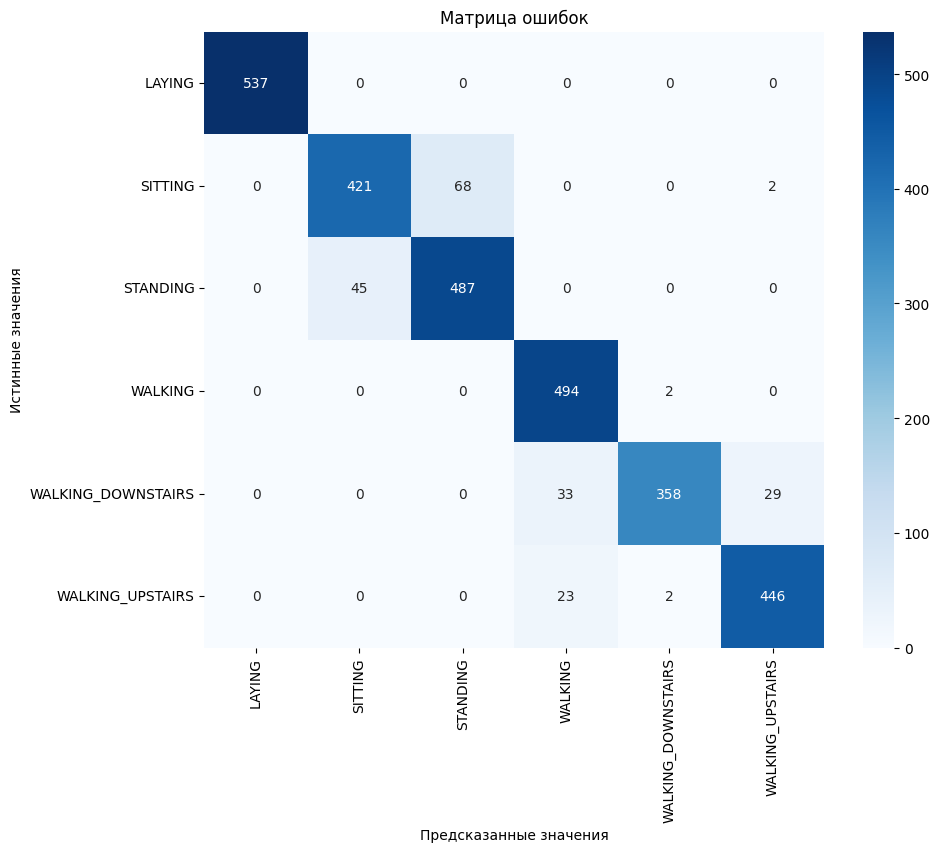

Точность (SVM, исходные данные): 0.9308
Отчет классификации (SVM, исходные данные):
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.86      0.88       491
          STANDING       0.88      0.92      0.90       532
           WALKING       0.90      1.00      0.94       496
WALKING_DOWNSTAIRS       0.99      0.85      0.92       420
  WALKING_UPSTAIRS       0.94      0.95      0.94       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947


Модель с высокой метрикой качества 0.9308, которая однако ниже логистической регрессии со стандартизацией 0.9623.
Переобучена на 0 классе.



In [22]:
#4.3.1 SVM на исходных данных (без масштабирования)

print("Обучение модели SVM на исходных данных (без масштабирования):")
X_train_raw = eda.train_data.drop(columns=['Activity'])
y_train_raw = eda.train_data['Activity']
X_test_raw = eda.test_data.drop(columns=['Activity'])
y_test_raw = eda.test_data['Activity']

model_svm_raw, accuracy_svm_raw, report_svm_raw, conf_matrix_svm_raw = model_trainer.train_svm(X_train_raw, y_train_raw, X_test_raw, y_test_raw)

print(f'Точность (SVM, исходные данные): {accuracy_svm_raw:.4f}')
print('Отчет классификации (SVM, исходные данные):')
print(report_svm_raw)
print(f"""
Модель с высокой метрикой качества {accuracy_svm_raw:.4f}, которая однако ниже логистической регрессии со стандартизацией {accuracy_std:.4f}.
Переобучена на 0 классе.
""")

Обучение модели SVM на данных с масштабированием MaxAbs:


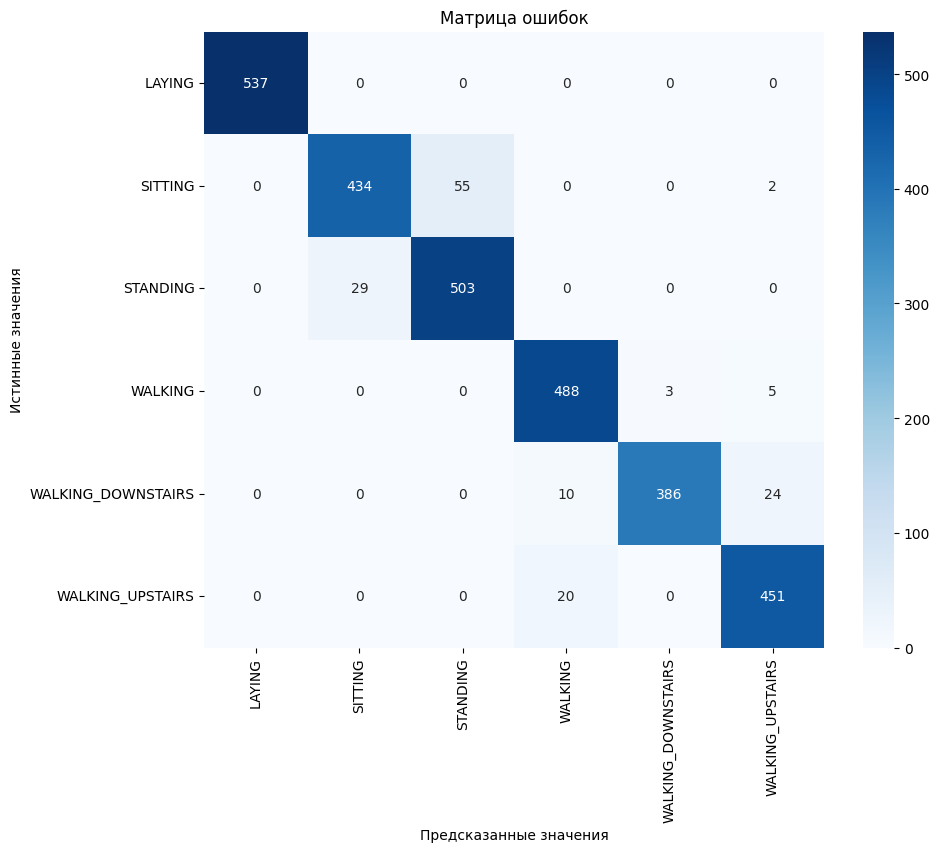

Точность (SVM, MaxAbs масштабирование): 0.9498
Отчет классификации (SVM, MaxAbs масштабирование):
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.88      0.91       491
          STANDING       0.90      0.95      0.92       532
           WALKING       0.94      0.98      0.96       496
WALKING_DOWNSTAIRS       0.99      0.92      0.95       420
  WALKING_UPSTAIRS       0.94      0.96      0.95       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947


Масштабированием MaxAbs повысило метрику с 0.9308 до 0.9498,
но не исправило переобучение.



In [23]:
#4.3.2 SVM на данных с масштабированием MaxAbs
print("Обучение модели SVM на данных с масштабированием MaxAbs:")
X_train_maxabs = maxabs_scaled_train_data.drop(columns=['Activity'])
y_train_maxabs = maxabs_scaled_train_data['Activity']
X_test_maxabs = maxabs_scaled_test_data.drop(columns=['Activity'])
y_test_maxabs = maxabs_scaled_test_data['Activity']

model_svm_maxabs, accuracy_svm_maxabs, report_svm_maxabs, conf_matrix_svm_maxabs = model_trainer.train_svm(X_train_maxabs, y_train_maxabs, X_test_maxabs, y_test_maxabs)

print(f'Точность (SVM, MaxAbs масштабирование): {accuracy_svm_maxabs:.4f}')
print('Отчет классификации (SVM, MaxAbs масштабирование):')
print(report_svm_maxabs)
print(f"""
Масштабированием MaxAbs повысило метрику с {accuracy_svm_raw:.4f} до {accuracy_svm_maxabs:.4f},
но не исправило переобучение.
""")

Обучение модели SVM на стандартизированных данных:


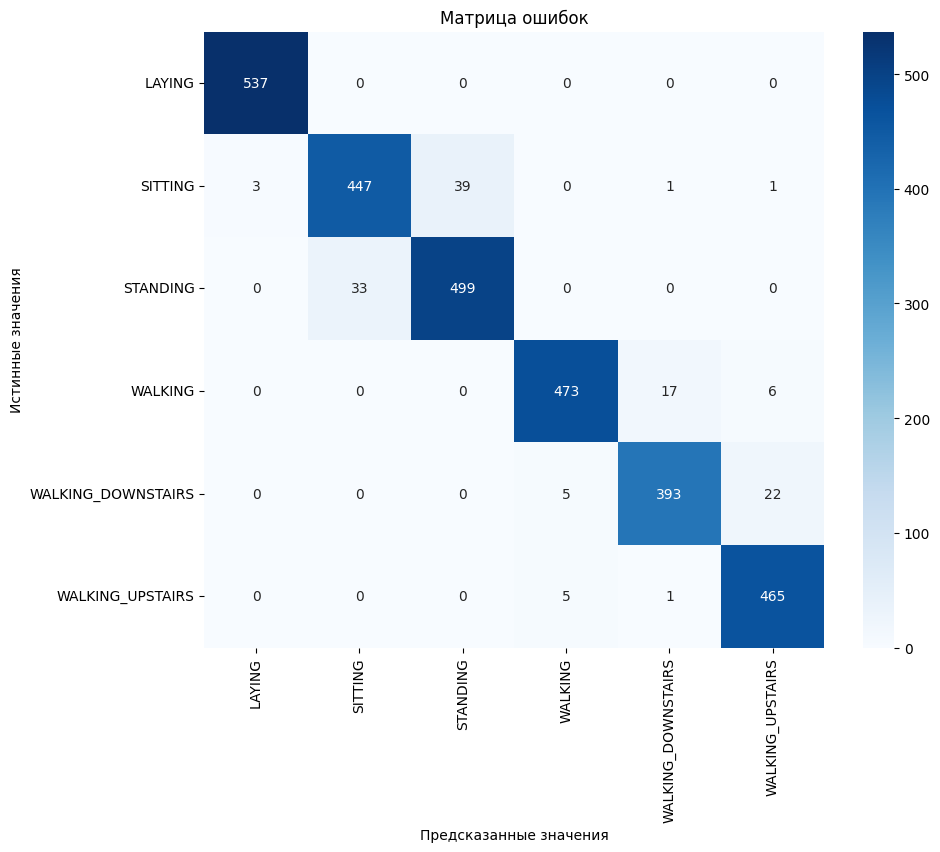

Точность (SVM, стандартизированные данные): 0.9549
Отчет классификации (SVM, стандартизированные данные):
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.93      0.91      0.92       491
          STANDING       0.93      0.94      0.93       532
           WALKING       0.98      0.95      0.97       496
WALKING_DOWNSTAIRS       0.95      0.94      0.94       420
  WALKING_UPSTAIRS       0.94      0.99      0.96       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.96      0.95      0.95      2947


Лучшие показатели у SVM на стандартизированных данных. Метрика выросла с 0.9308 до 0.9549.
ВОПРОС: можно ли считать переобученным класс "Лежание"?
        precision    recall  f1-score   support
LAYING       0.99      1.00      1.00       537



In [24]:
#4.3.3 SVM на стандартизированных данных
print("Обучение модели SVM на стандартизированных данных:")
X_train_std = standard_scaled_train_data.drop(columns=['Activity'])
y_train_std = standard_scaled_train_data['Activity']
X_test_std = standard_scaled_test_data.drop(columns=['Activity'])
y_test_std = standard_scaled_test_data['Activity']

model_svm_std, accuracy_svm_std, report_svm_std, conf_matrix_svm_std = model_trainer.train_svm(X_train_std, y_train_std, X_test_std, y_test_std)

print(f'Точность (SVM, стандартизированные данные): {accuracy_svm_std:.4f}')
print('Отчет классификации (SVM, стандартизированные данные):')
print(report_svm_std)
print(f"""
Лучшие показатели у SVM на стандартизированных данных. Метрика выросла с {accuracy_svm_raw:.4f} до {accuracy_svm_std:.4f}.
ВОПРОС: можно ли считать переобученным класс "Лежание"?
        precision    recall  f1-score   support
LAYING       0.99      1.00      1.00       537
""")

In [25]:
#4.4 Случайный лес (Random Forest)

Обучение модели Random Forest на исходных данных (без масштабирования):


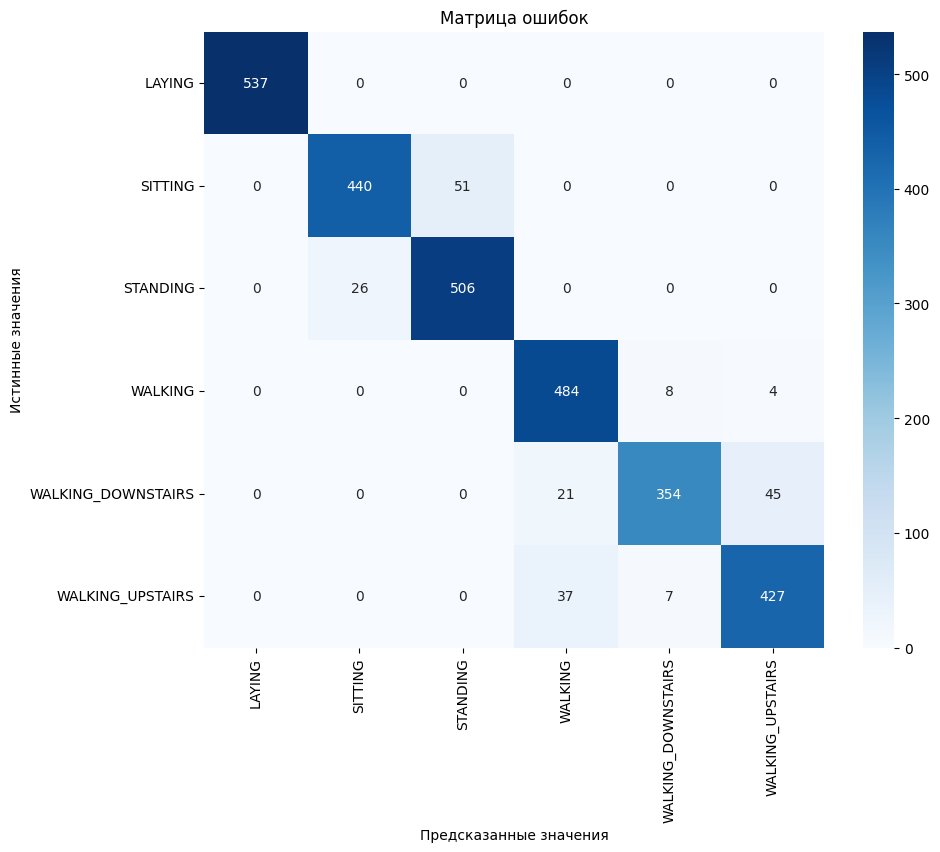

Точность (Random Forest, исходные данные): 0.9325
Отчет классификации (Random Forest, исходные данные):
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.90      0.92       491
          STANDING       0.91      0.95      0.93       532
           WALKING       0.89      0.98      0.93       496
WALKING_DOWNSTAIRS       0.96      0.84      0.90       420
  WALKING_UPSTAIRS       0.90      0.91      0.90       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947


Модель с высокой метрикой качества 0.9325, которая однако ниже логистической регрессии со стандартизацией 0.9623.
Переобучена на 0 классе.



In [26]:
#4.4.1 Random Forest на исходных данных (без масштабирования)
print("Обучение модели Random Forest на исходных данных (без масштабирования):")
X_train_raw = eda.train_data.drop(columns=['Activity'])
y_train_raw = eda.train_data['Activity']
X_test_raw = eda.test_data.drop(columns=['Activity'])
y_test_raw = eda.test_data['Activity']

model_rf_raw, accuracy_rf_raw, report_rf_raw, conf_matrix_rf_raw = model_trainer.train_random_forest(X_train_raw, y_train_raw, X_test_raw, y_test_raw)

print(f'Точность (Random Forest, исходные данные): {accuracy_rf_raw:.4f}')
print('Отчет классификации (Random Forest, исходные данные):')
print(report_rf_raw)
print(f"""
Модель с высокой метрикой качества {accuracy_rf_raw:.4f}, которая однако ниже логистической регрессии со стандартизацией {accuracy_std:.4f}.
Переобучена на 0 классе.
""") 


Проверим гипоезу о нечувствительности случайного леса к масштабированию
и обучим модель Random Forest на стандартизированных данных:



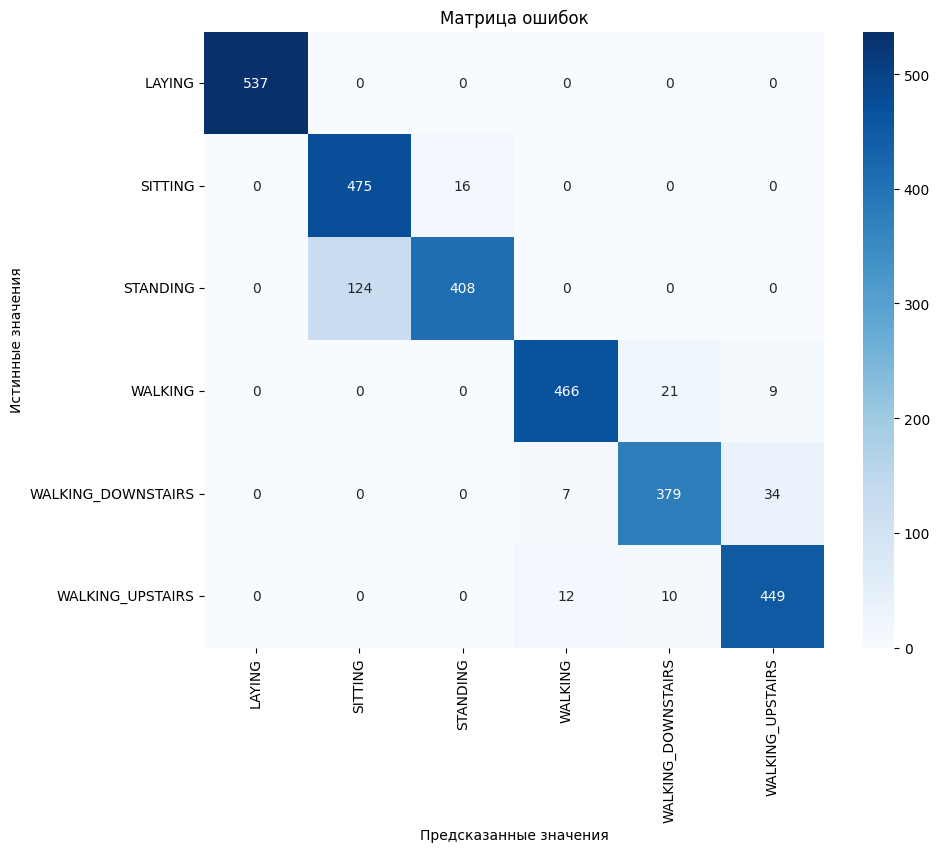

Точность (Random Forest, стандартизированные данные): 0.9209
Отчет классификации (Random Forest, стандартизированные данные):
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.79      0.97      0.87       491
          STANDING       0.96      0.77      0.85       532
           WALKING       0.96      0.94      0.95       496
WALKING_DOWNSTAIRS       0.92      0.90      0.91       420
  WALKING_UPSTAIRS       0.91      0.95      0.93       471

          accuracy                           0.92      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.92      0.92      2947


После стандартизации данных точность модели упала с  0.9325 до 0.9209,
при этом проблема переобучения 0 класса осталась нерешенной.



In [27]:
#4.4.2 Random Forest на стандартизированных данных
print("""
Проверим гипоезу о нечувствительности случайного леса к масштабированию
и обучим модель Random Forest на стандартизированных данных:
""")
X_train_std = standard_scaled_train_data.drop(columns=['Activity'])
y_train_std = standard_scaled_train_data['Activity']
X_test_std = standard_scaled_test_data.drop(columns=['Activity'])
y_test_std = standard_scaled_test_data['Activity']

model_rf_std, accuracy_rf_std, report_rf_std, conf_matrix_rf_std = model_trainer.train_random_forest(X_train_std, y_train_std, X_test_std, y_test_std)

print(f'Точность (Random Forest, стандартизированные данные): {accuracy_rf_std:.4f}')
print('Отчет классификации (Random Forest, стандартизированные данные):')
print(report_rf_std)
print(f"""
После стандартизации данных точность модели упала с  {accuracy_rf_raw:.4f} до {accuracy_rf_std:.4f},
при этом проблема переобучения 0 класса осталась нерешенной.
""")

In [28]:
#4.5 Градиентный бустинг (Gradient Boosting)

Обучение модели Gradient Boosting (без масштабирования):


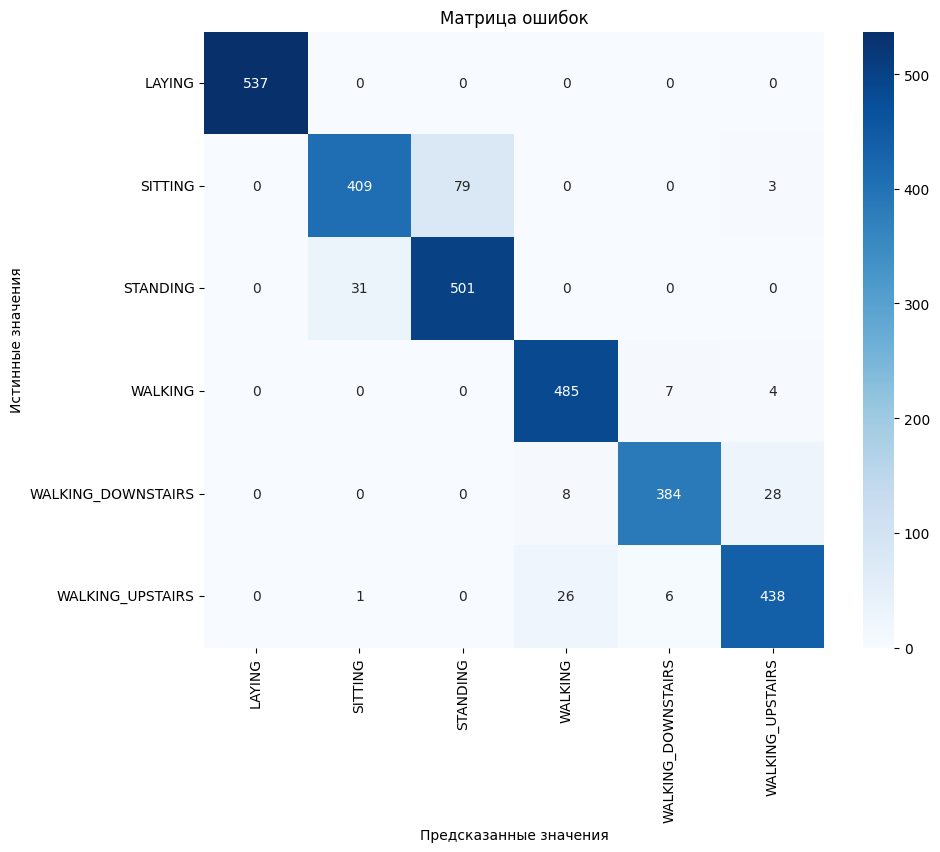

Точность (Gradient Boosting): 0.9345
Отчет классификации (Gradient Boosting):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.93      0.83      0.88       491
           2       0.86      0.94      0.90       532
           3       0.93      0.98      0.96       496
           4       0.97      0.91      0.94       420
           5       0.93      0.93      0.93       471

    accuracy                           0.93      2947
   macro avg       0.94      0.93      0.93      2947
weighted avg       0.94      0.93      0.93      2947


Модель с высокой метрикой качества 0.9345, которая однако ниже логистической регрессии со стандартизацией 0.9623.
Переобучена на 0 классе.



In [29]:
#4.5.1 Gradient Boosting на исходных данных c преобразованной целевой переменной в числовые значения
print("Обучение модели Gradient Boosting (без масштабирования):")
X_train_raw = train_data_encoded.drop(columns=['Activity'])
y_train_raw = train_data_encoded['Activity']
X_test_raw = test_data_encoded.drop(columns=['Activity'])
y_test_raw = test_data_encoded['Activity']

# Измерение времени выполнения Gradient Boosting на исходных данных для сравнения с логистической регрессией стандартизированных данных
start_time = time.time()

model_gb_raw, accuracy_gb_raw, report_gb_raw, conf_matrix_gb_raw = model_trainer.train_gradient_boosting(X_train_raw, y_train_raw, X_test_raw, y_test_raw)

end_time = time.time()
execution_time_gb_raw = end_time - start_time
memory_info_gb_raw = process.memory_info()
cpu_percent_gb_raw = process.cpu_percent(interval=None)
                                        
print(f'Точность (Gradient Boosting): {accuracy_gb_raw:.4f}')
print('Отчет классификации (Gradient Boosting):')
print(report_gb_raw)

print(f"""
Модель с высокой метрикой качества {accuracy_gb_raw:.4f}, которая однако ниже логистической регрессии со стандартизацией {accuracy_std:.4f}.
Переобучена на 0 классе.
""")

In [30]:
# Сравнение трудозатратности ансамблевого метода с регрессией
print("Сравним трудозатратность двух методов:\n")

print(f'Время выполнения (логистическая регрессия со стандартизацией в обычном режиме): {execution_time_lr_std:.4f} секунд')
print(f'Использование памяти (логистическая регрессия со стандартизацией): {memory_info_lr_std.rss / 1024 ** 2:.2f} MB')
print(f'Загрузка процессора (логистическая регрессия со стандартизацией): {cpu_percent_lr_std:.2f}%')
print(f'Точность (Логистическая регрессия, стандартизованные данные): {accuracy_std:.4f}')

print(f'\nВремя выполнения (Gradient Boosting с использованием всех доступных процессоров): {execution_time_gb_raw:.4f} секунд')
print(f'Использование памяти (Gradient Boosting на исходных данных): {memory_info_gb_raw.rss / 1024 ** 2:.2f} MB')
print(f'Загрузка процессора (Gradient Boosting на исходных данных): {cpu_percent_gb_raw:.2f}%')
print(f'Точность (Gradient Boosting): {accuracy_gb_raw:.4f}')

print(f"""
\nПри значительно более низкой трудозатратности по всем параметрам,
Логистическая регрессия со стандартизацией на данном дата сете показала более высокую метрику качества,
чем ансамблевый метод, без признаков переобучения.
""")

Сравним трудозатратность двух методов:

Время выполнения (логистическая регрессия со стандартизацией в обычном режиме): 3.9802 секунд
Использование памяти (логистическая регрессия со стандартизацией): 624.58 MB
Загрузка процессора (логистическая регрессия со стандартизацией): 0.00%
Точность (Логистическая регрессия, стандартизованные данные): 0.9623

Время выполнения (Gradient Boosting с использованием всех доступных процессоров): 36.0071 секунд
Использование памяти (Gradient Boosting на исходных данных): 893.82 MB
Загрузка процессора (Gradient Boosting на исходных данных): 158.10%
Точность (Gradient Boosting): 0.9345


При значительно более низкой трудозатратности по всем параметрам,
Логистическая регрессия со стандартизацией на данном дата сете показала более высокую метрику качества,
чем ансамблевый метод, без признаков переобучения.



In [31]:
#4.6 Наивный байесовский классификатор (Naive Bayes)

Обучение модели Наивного байесовского классификатора на исходных данных (без масштабирования):


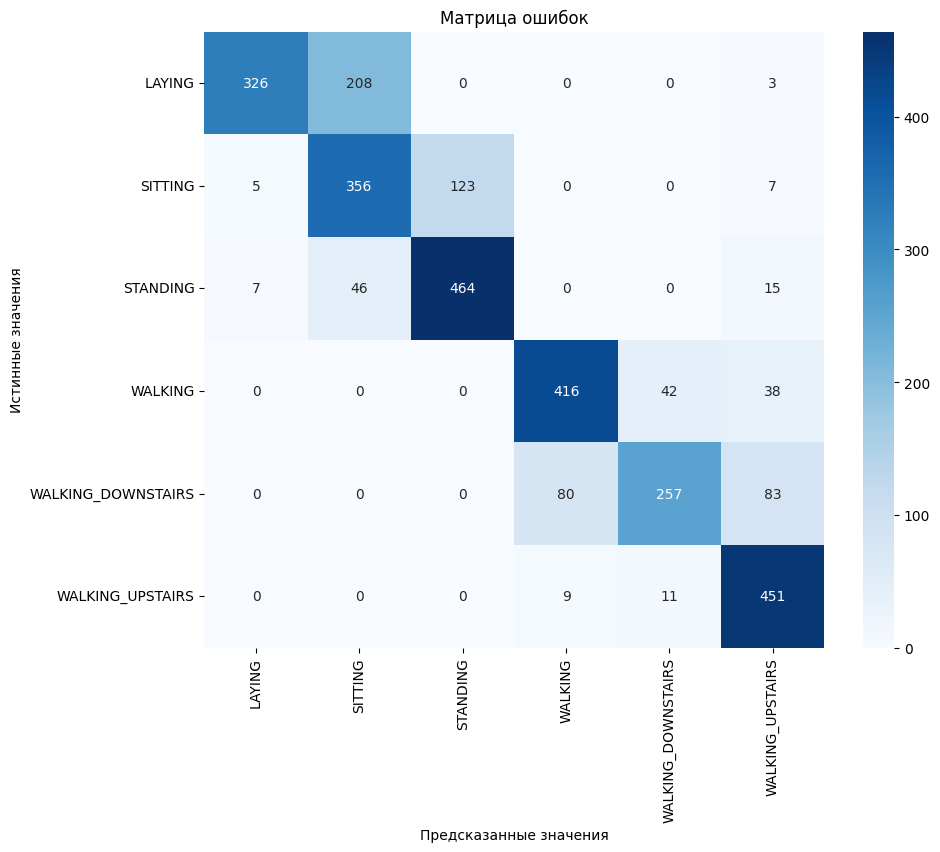

Точность (Наивный байесовский классификатор, исходные данные): 0.7703
Отчет классификации (Наивный байесовский классификатор, исходные данные):
                    precision    recall  f1-score   support

            LAYING       0.96      0.61      0.75       537
           SITTING       0.58      0.73      0.65       491
          STANDING       0.79      0.87      0.83       532
           WALKING       0.82      0.84      0.83       496
WALKING_DOWNSTAIRS       0.83      0.61      0.70       420
  WALKING_UPSTAIRS       0.76      0.96      0.84       471

          accuracy                           0.77      2947
         macro avg       0.79      0.77      0.77      2947
      weighted avg       0.79      0.77      0.77      2947



Точность Наивного байесовского классификатора оказалась ниже всех других рассмотренных моделей.



In [32]:
#4.6.1 Наивный байесовский классификатор на исходных данных (без масштабирования)
print("Обучение модели Наивного байесовского классификатора на исходных данных (без масштабирования):")
X_train_raw = eda.train_data.drop(columns=['Activity'])
y_train_raw = eda.train_data['Activity']
X_test_raw = eda.test_data.drop(columns=['Activity'])
y_test_raw = eda.test_data['Activity']

model_nb_raw, accuracy_nb_raw, report_nb_raw, conf_matrix_nb_raw = model_trainer.train_naive_bayes(X_train_raw, y_train_raw, X_test_raw, y_test_raw)

print(f'Точность (Наивный байесовский классификатор, исходные данные): {accuracy_nb_raw:.4f}')
print('Отчет классификации (Наивный байесовский классификатор, исходные данные):')
print(report_nb_raw)
print(f"""
\nТочность Наивного байесовского классификатора оказалась ниже всех других рассмотренных моделей.
""")

In [33]:
#5. Сравнение моделей

In [34]:
print(f'Сравнение моделей по точности и способности предсказывать, а не запоминать:\n')

print(f'Логистическая регрессия, без масштабирования: {accuracy_raw:.4f}; переобучена на 0 классе')
print(f'Логистическая регрессия, стандартизованные данные: {accuracy_std:.4f}; не переобучена')

print(f'\nK-ближайших соседей, без масштабирования: {accuracy_knn_raw:.4f}; не переобучена')
print(f'K-ближайших соседей, Min-Max масштабирование: {accuracy_knn_minmax:.4f}; переобучена на 0 классе')
print(f'K-ближайших соседей, нормализованные данные: {accuracy_knn_norm:.4f}; не переобучена')

print(f'\nМетод опорных векторов, без масштабирования: {accuracy_svm_raw:.4f}; переобучена на 0 классе')
print(f'\nМетод опорных векторов, MaxAbs масштабирование: {accuracy_svm_maxabs:.4f}; переобучена на 0 классе')
print(f'Метод опорных векторов, стандартизированные данные: {accuracy_svm_std:.4f}; не переобучена (но это не точно)')

print(f'\nСлучайный лес, без масштабирования: {accuracy_rf_raw:.4f}; переобучена на 0 классе')
print(f'Случайный лес, стандартизированные данные: {accuracy_rf_std:.4f}; переобучена на 0 классе')

print(f'\nГрадиентный бустинг, без масштабирования: {accuracy_gb_raw:.4f}; переобучена на 0 классе')

print(f'\nНаивный байесовский классификатор, без масштабирования: {accuracy_nb_raw:.4f}; переобучена на 0 классе')

print(f'\nЛучшая модель: Логистическая регрессия с предваительной стандартизацией данных с помощью StandardScaler')

Сравнение моделей по точности и способности предсказывать, а не запоминать:

Логистическая регрессия, без масштабирования: 0.9596; переобучена на 0 классе
Логистическая регрессия, стандартизованные данные: 0.9623; не переобучена

K-ближайших соседей, без масштабирования: 0.8096; не переобучена
K-ближайших соседей, Min-Max масштабирование: 0.8843; переобучена на 0 классе
K-ближайших соседей, нормализованные данные: 0.8517; не переобучена

Метод опорных векторов, без масштабирования: 0.9308; переобучена на 0 классе

Метод опорных векторов, MaxAbs масштабирование: 0.9498; переобучена на 0 классе
Метод опорных векторов, стандартизированные данные: 0.9549; не переобучена (но это не точно)

Случайный лес, без масштабирования: 0.9325; переобучена на 0 классе
Случайный лес, стандартизированные данные: 0.9209; переобучена на 0 классе

Градиентный бустинг, без масштабирования: 0.9345; переобучена на 0 классе

Наивный байесовский классификатор, без масштабирования: 0.7703; переобучена на 0 классе

In [35]:
#6. Сравнение лучшей модели на полных данных и после фича-селекции

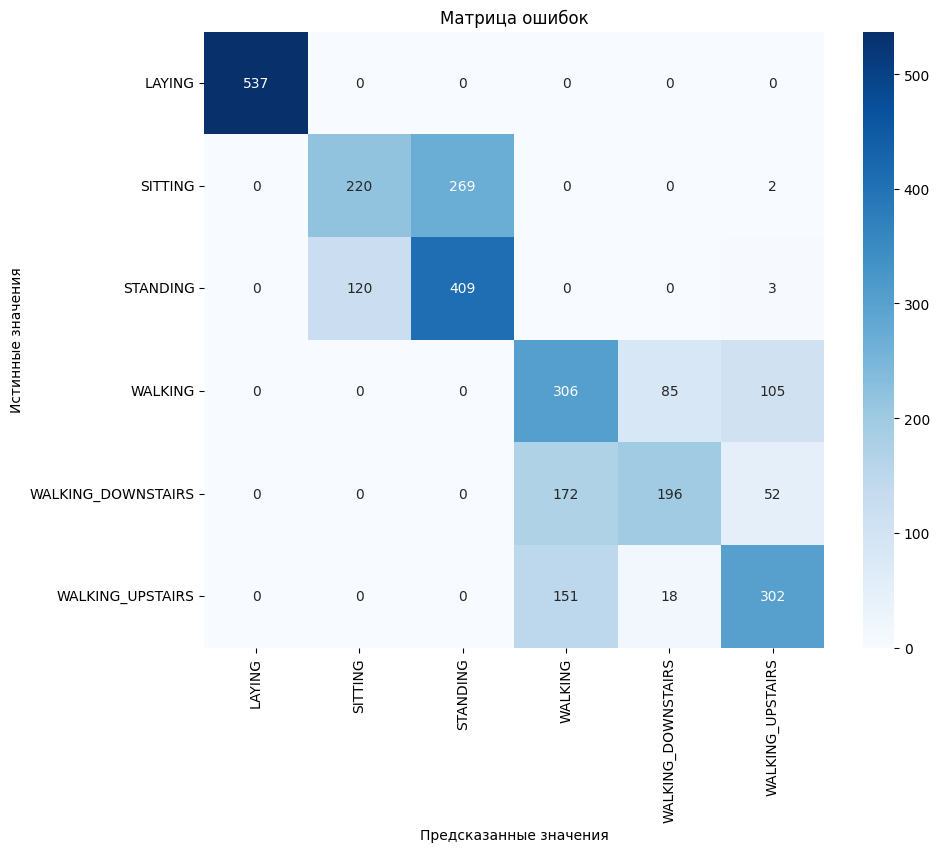

Точность (3 лучших признака): 0.6685
Отчет классификации (3 лучших признака):
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.65      0.45      0.53       491
          STANDING       0.60      0.77      0.68       532
           WALKING       0.49      0.62      0.54       496
WALKING_DOWNSTAIRS       0.66      0.47      0.55       420
  WALKING_UPSTAIRS       0.65      0.64      0.65       471

          accuracy                           0.67      2947
         macro avg       0.67      0.66      0.66      2947
      weighted avg       0.68      0.67      0.66      2947



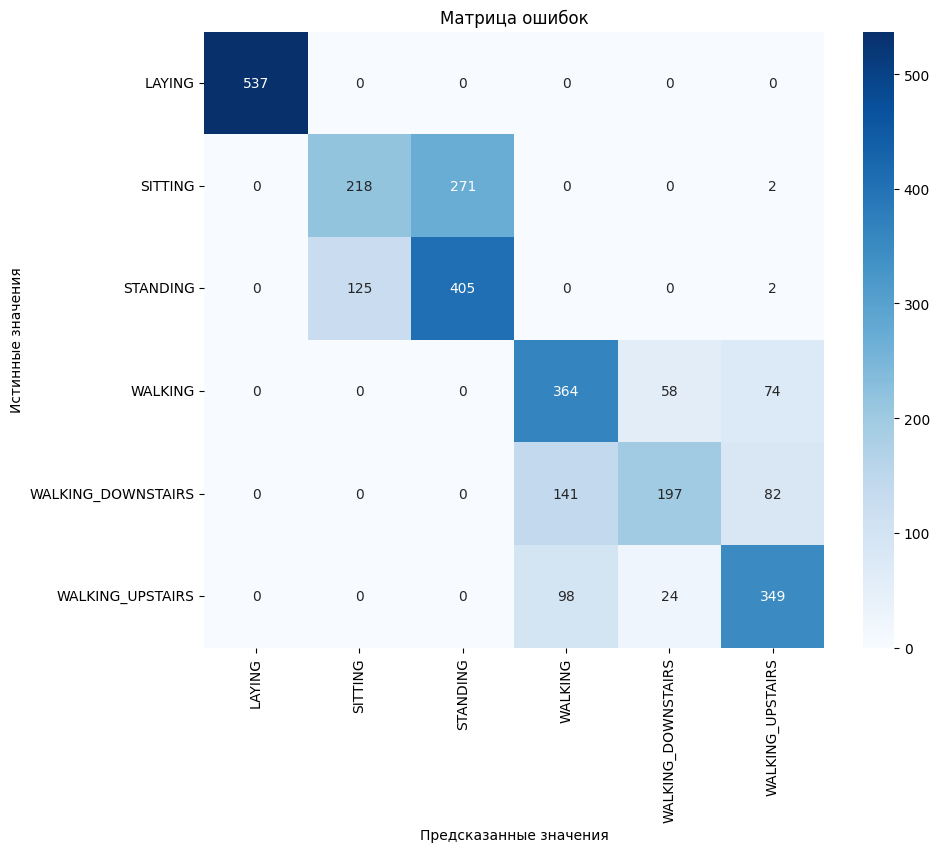

Точность (5 лучших признака): 0.7024
Отчет классификации (5 лучших признака):
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.64      0.44      0.52       491
          STANDING       0.60      0.76      0.67       532
           WALKING       0.60      0.73      0.66       496
WALKING_DOWNSTAIRS       0.71      0.47      0.56       420
  WALKING_UPSTAIRS       0.69      0.74      0.71       471

          accuracy                           0.70      2947
         macro avg       0.71      0.69      0.69      2947
      weighted avg       0.71      0.70      0.70      2947



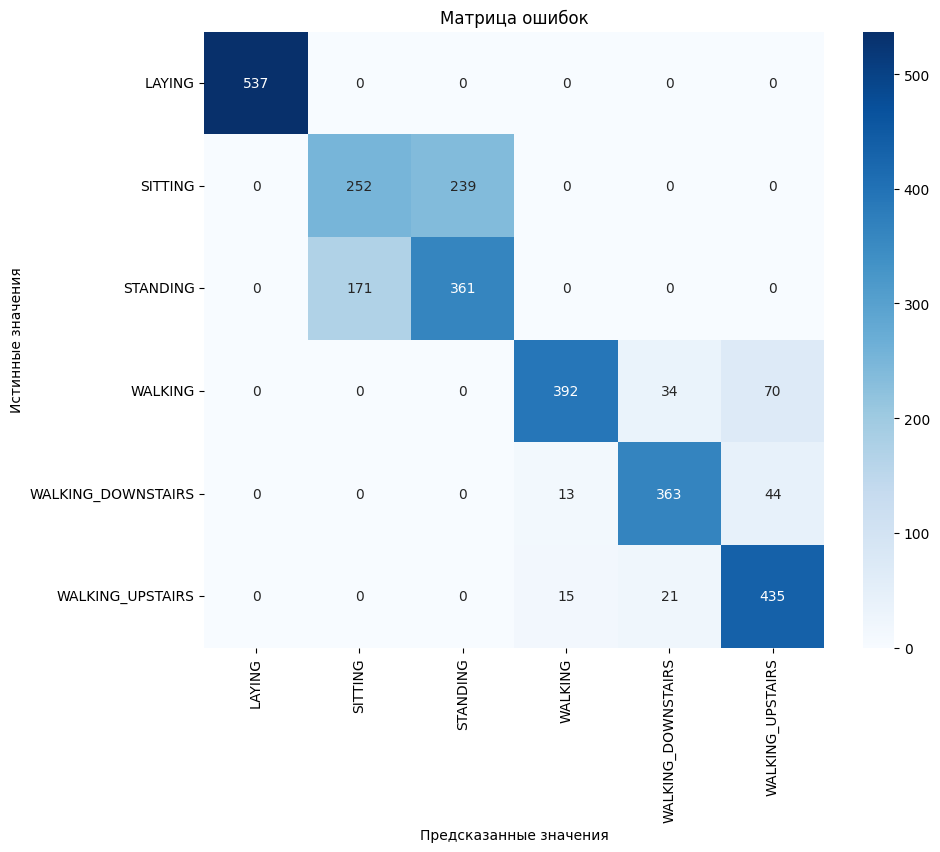

Точность (15 лучших признака): 0.7940
Отчет классификации (15 лучших признака):
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.60      0.51      0.55       491
          STANDING       0.60      0.68      0.64       532
           WALKING       0.93      0.79      0.86       496
WALKING_DOWNSTAIRS       0.87      0.86      0.87       420
  WALKING_UPSTAIRS       0.79      0.92      0.85       471

          accuracy                           0.79      2947
         macro avg       0.80      0.79      0.79      2947
      weighted avg       0.80      0.79      0.79      2947



In [36]:
# Импортируем модуль выбора k лучших признаков 
from Modules.feature_engineering import FeatureEngineering

# Создаем экземпляры класса
feature_engineering = FeatureEngineering()

# Оценка модели Логистической регрессии с выбором 3 лучших признаков (стандартизованные данные)
# Оценка модели с выбором 3 лучших признаков
selected_features_train_3 = feature_engineering.select_k_best_features(eda.train_data.drop(columns=['Activity']), eda.train_data['Activity'], k=3)
selected_features_names_3 = selected_features_train_3.columns
selected_features_test_3 = eda.test_data[selected_features_names_3]

train_data_selected_3 = pd.concat([selected_features_train_3, eda.train_data['Activity'].reset_index(drop=True)], axis=1)
test_data_selected_3 = pd.concat([selected_features_test_3, eda.test_data['Activity'].reset_index(drop=True)], axis=1)

train_data_scaled_3 = scaler.standard_scale(train_data_selected_3)
test_data_scaled_3 = scaler.standard_scale(test_data_selected_3)

X_train_scaled_3 = train_data_scaled_3.drop(columns=['Activity'])
y_train_scaled_3 = train_data_scaled_3['Activity']
X_test_scaled_3 = test_data_scaled_3.drop(columns=['Activity'])
y_test_scaled_3 = test_data_scaled_3['Activity']

_, accuracy_3, report_3, conf_matrix_3 = model_trainer.train_logistic_regression(X_train_scaled_3, y_train_scaled_3, X_test_scaled_3, y_test_scaled_3)
print(f'Точность (3 лучших признака): {accuracy_3:.4f}')
print('Отчет классификации (3 лучших признака):')
print(report_3)

# Оценка модели с выбором 5 лучших признаков
selected_features_train_5 = feature_engineering.select_k_best_features(eda.train_data.drop(columns=['Activity']), eda.train_data['Activity'], k=5)
selected_features_names_5 = selected_features_train_5.columns
selected_features_test_5 = eda.test_data[selected_features_names_5]

train_data_selected_5 = pd.concat([selected_features_train_5, eda.train_data['Activity'].reset_index(drop=True)], axis=1)
test_data_selected_5 = pd.concat([selected_features_test_5, eda.test_data['Activity'].reset_index(drop=True)], axis=1)

train_data_scaled_5 = scaler.standard_scale(train_data_selected_5)
test_data_scaled_5 = scaler.standard_scale(test_data_selected_5)

X_train_scaled_5 = train_data_scaled_5.drop(columns=['Activity'])
y_train_scaled_5 = train_data_scaled_5['Activity']
X_test_scaled_5 = test_data_scaled_5.drop(columns=['Activity'])
y_test_scaled_5 = test_data_scaled_5['Activity']

_, accuracy_5, report_5, conf_matrix_5 = model_trainer.train_logistic_regression(X_train_scaled_5, y_train_scaled_5, X_test_scaled_5, y_test_scaled_5)
print(f'Точность (5 лучших признака): {accuracy_5:.4f}')
print('Отчет классификации (5 лучших признака):')
print(report_5)

# Оценка модели с выбором 15 лучших признаков
selected_features_train_15 = feature_engineering.select_k_best_features(eda.train_data.drop(columns=['Activity']), eda.train_data['Activity'], k=15)
selected_features_names_15 = selected_features_train_15.columns
selected_features_test_15 = eda.test_data[selected_features_names_15]

train_data_selected_15 = pd.concat([selected_features_train_15, eda.train_data['Activity'].reset_index(drop=True)], axis=1)
test_data_selected_15 = pd.concat([selected_features_test_15, eda.test_data['Activity'].reset_index(drop=True)], axis=1)

train_data_scaled_15 = scaler.standard_scale(train_data_selected_15)
test_data_scaled_15 = scaler.standard_scale(test_data_selected_15)

X_train_scaled_15 = train_data_scaled_15.drop(columns=['Activity'])
y_train_scaled_15 = train_data_scaled_15['Activity']
X_test_scaled_15 = test_data_scaled_15.drop(columns=['Activity'])
y_test_scaled_15 = test_data_scaled_15['Activity']

_, accuracy_15, report_15, conf_matrix_15 = model_trainer.train_logistic_regression(X_train_scaled_15, y_train_scaled_15, X_test_scaled_15, y_test_scaled_15)
print(f'Точность (15 лучших признака): {accuracy_15:.4f}')
print('Отчет классификации (15 лучших признака):')
print(report_15)


In [37]:
# Сравнение с исходной моделью (без фича-селекции)
print(f'Точность (Логистическая регрессия, стандартизованные данные): {accuracy_std:.4f}; не переобучена')
print(f'Точность (3 лучших признака): {accuracy_3:.4f}; переобучена на 0 классе')
print(f'Точность (5 лучших признака): {accuracy_5:.4f}; переобучена на 0 классе')
print(f'Точность (15 лучших признака): {accuracy_15:.4f}; переобучена на 0 классе')
print(f'\nФича-селекция лучшей модели ведет к значительному падению метрики качества и переобучению на 0 классе')

Точность (Логистическая регрессия, стандартизованные данные): 0.9623; не переобучена
Точность (3 лучших признака): 0.6685; переобучена на 0 классе
Точность (5 лучших признака): 0.7024; переобучена на 0 классе
Точность (15 лучших признака): 0.7940; переобучена на 0 классе

Фича-селекция лучшей модели ведет к значительному падению метрики качества и переобучению на 0 классе
